In [ ]:
                                                                  ####EDA__1 BIKE SALES DATA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("BIKE DETAILS.csv")

In [3]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [31]:
#Q1 What is the range of selling prices in the dataset?
range = df["selling_price"].max() - df["selling_price"].min()
print(f'Range of selling prices: {range}')


Range of selling prices: 755000


In [32]:
#Q2 What is the median selling price for bikes in the dataset?
median=df['selling_price'].median()
print(f'Median selling price: {median}')


Median selling price: 45000.0


In [41]:
##Q3  What is the most common seller type?
most_common_seller_type = df['seller_type'].value_counts().index[0]

print(f'Most common seller type: {most_common_seller_type}')


Most common seller type: Individual


In [44]:
##Q4 How many bikes have driven more than 50,000 kilometers?
bikes=df[df["km_driven"]>50000]["name"].value_counts().shape
print(f'Number of bikes driven more than 50,000 km: {bikes}')

Number of bikes driven more than 50,000 km: (77,)


In [54]:
##Q5 What is the average km_driven value for each ownership type?
avg_km_driven = df.groupby("owner")["km_driven"].mean()
print(avg_km_driven)



owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [57]:
##Q6 What proportion of bikes are from the year 2015 or older?
proportion = df[df['year'] <= 2015].shape[0] / df.shape[0]
print(f'Proportion of bikes from 2015 or older: {proportion*100}"%"')

Proportion of bikes from 2015 or older: 56.64467483506126"%"


In [60]:
## Q7 What is the trend of missing values across the dataset?
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [80]:
## Q8  What is the highest ex_showroom_price recorded, and for which bike?
max_price = df['ex_showroom_price'].max()
bike = df.loc[df['ex_showroom_price'] == max_price, 'name']

print(f'Highest ex-showroom price: {max_price}')
print(f'Bike: {bike}')



Highest ex-showroom price: 1278000.0
Bike: 134    Harley-Davidson Street Bob
Name: name, dtype: object


In [21]:
##Q9 What is the total number of bikes listed by each seller type?
bikes_list_by_seller=df.groupby("seller_type")["name"].count().reset_index()

bikes_list_by_seller


,seller_type,name
0,Dealer,6
1,Individual,1055


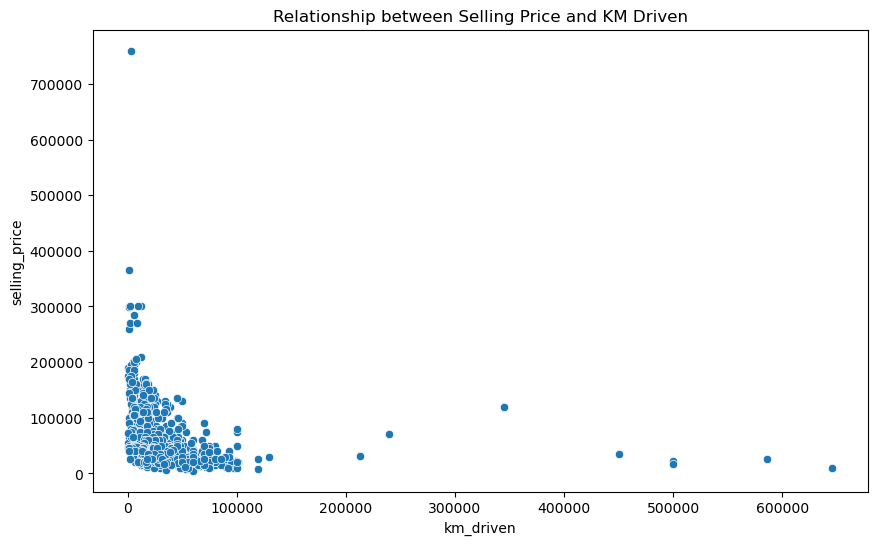

In [124]:
## Q10 What is the relationship between selling_price and km_driven for first-owner bikes?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df[df['owner'] == '1st owner'])
plt.title('Relationship between Selling Price and KM Driven')
plt.show()

In [5]:
#Q11 Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Removed {len(df) - len(df_filtered)} outliers")




Removed 39 outliers


<Figure size 1000x600 with 0 Axes>

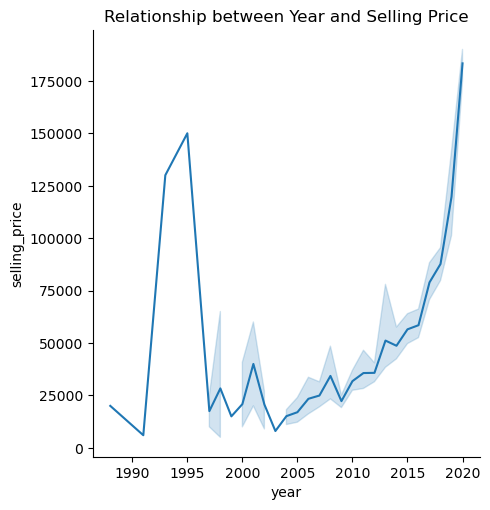

In [7]:
##Q12 Perform a bivariate analysis to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.relplot(x='year', y='selling_price', data=df,kind="line")
plt.title('Relationship between Year and Selling Price')
plt.show()


In [12]:
##Q13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
df['age'] = 2025 - df['year']  # assuming current year is 2025
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_depreciation = df.groupby('age')['depreciation'].mean().reset_index()
print(avg_depreciation)


    age  depreciation
0     5 -34260.000000
1     6   2954.562500
2     7  13023.194805
3     8  22306.082353
4     9  28328.190476
5    10  28013.275000
6    11  34505.606061
7    12  43086.886792
8    13  37317.648649
9    14  47102.666667
10   15  45658.928571
11   16  38227.785714
12   17  54732.428571
13   18  42399.000000
14   19  39664.500000
15   20  44852.000000
16   21  36852.000000
17   22           NaN
18   23           NaN
19   24  34852.000000
20   25           NaN
21   26           NaN
22   27           NaN
23   28           NaN
24   30           NaN
25   32           NaN
26   34           NaN
27   37           NaN


In [5]:
##Q14 Which bike names are priced significantly above the average price for their manufacturing year?
      
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()


df_merged = df.merge(avg_price_by_year, on='year', suffixes=('', '_avg'))


df_merged['price_diff'] = df_merged['selling_price'] - df_merged['selling_price_avg']

# Identify bikes with price significantly above average
significantly_above_avg = df_merged[df_merged['price_diff'] > (df_merged['selling_price_avg'] * 0.2)]

# Print bike names
print(significantly_above_avg['name'].unique())


['Royal Enfield Classic 350' 'Yamaha YZF R3' 'Jawa Standard'
 'Royal Enfield Thunderbird 350X' 'Yamaha FZ25'
 'Royal Enfield Continental GT 650' 'Royal Enfield Interceptor 650'
 'Bajaj Dominar 400' 'KTM 250 Duke' 'KTM RC 390' 'Suzuki GSX S750'
 'TVS Apache RR310' 'Honda CBR-250R' 'KTM RC 200' 'Yamaha YZF R15 V3'
 'UM Renegade Mojave' 'KTM RC200' 'KTM 390 Duke' 'Mahindra Mojo XT300'
 'Royal Enfield Classic Desert Storm' 'TVS Apache RTR 200 4V'
 'Royal Enfield Thunderbird 350' 'Kawasaki Ninja 650 [2018-2019]'
 'UM Renegade Commando' 'Royal Enfield Himalayan' 'KTM 200 Duke'
 'Royal Enfield Classic Squadron Blue' 'Honda CBR150 R'
 'Bajaj Pulsar RS 200' 'Benelli TNT 25' 'KTM RC390'
 'Royal Enfield Thunder 500' 'Royal Enfield Classic Gunmetal Grey'
 'Bajaj Dominar 400 [2018]' 'BMW G310GS'
 'Royal Enfield Classic Stealth Black' 'Royal Enfield Classic Signals'
 'Yamaha Fazer 25' 'Royal Enfield Thunderbird 500X'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ABS [2013-2016]'
 'Honda CB Unicorn 160'

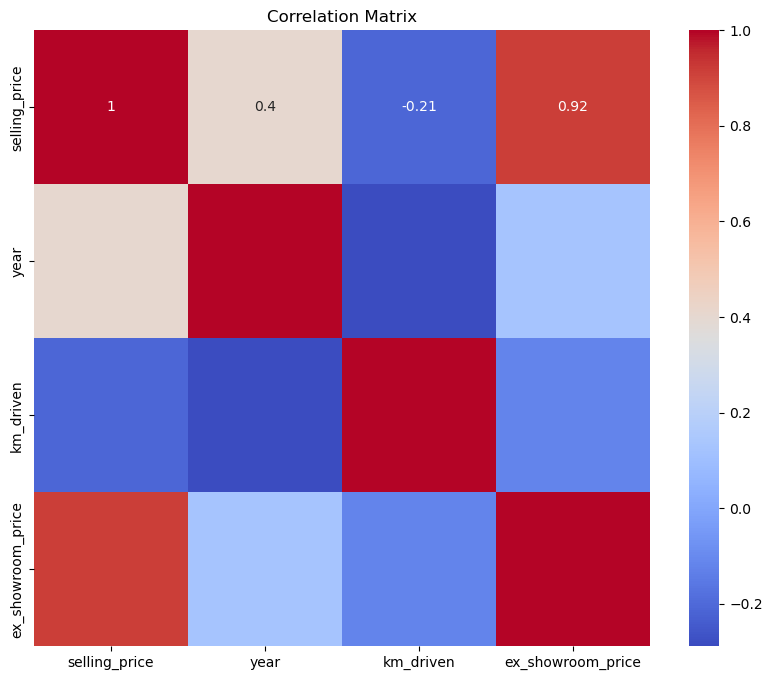

In [16]:
##Q15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()



In [ ]:
                                                          ####EDA 2 CAR SALES DATASET

In [7]:
df1=pd.read_csv("Car Sale.csv")

In [102]:
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


                                        Dealer_Name     Price ($)
0               Buddy Storbeck's Diesel Service Inc  27217.261563
1                                  C & M Motors Inc  28111.755200
2                                       Capitol KIA  28189.703822
3                                 Chrysler Plymouth  27555.526400
4                            Chrysler of Tri-Cities  28123.091054
5                                     Classic Chevy  28602.014446
6                           Clay Johnson Auto Sales  27816.027113
7                                Diehl Motor CO Inc  27993.929487
8                             Enterprise Rent A Car  28312.580800
9                        Gartner Buick Hyundai Saab  28247.621019
10                              Hatfield Volkswagen  27853.712242
11                                  Iceberg Rentals  28522.958533
12                     McKinney Dodge Chrysler Jeep  27684.096979
13                      Motor Vehicle Branch Office  27956.739617
14        

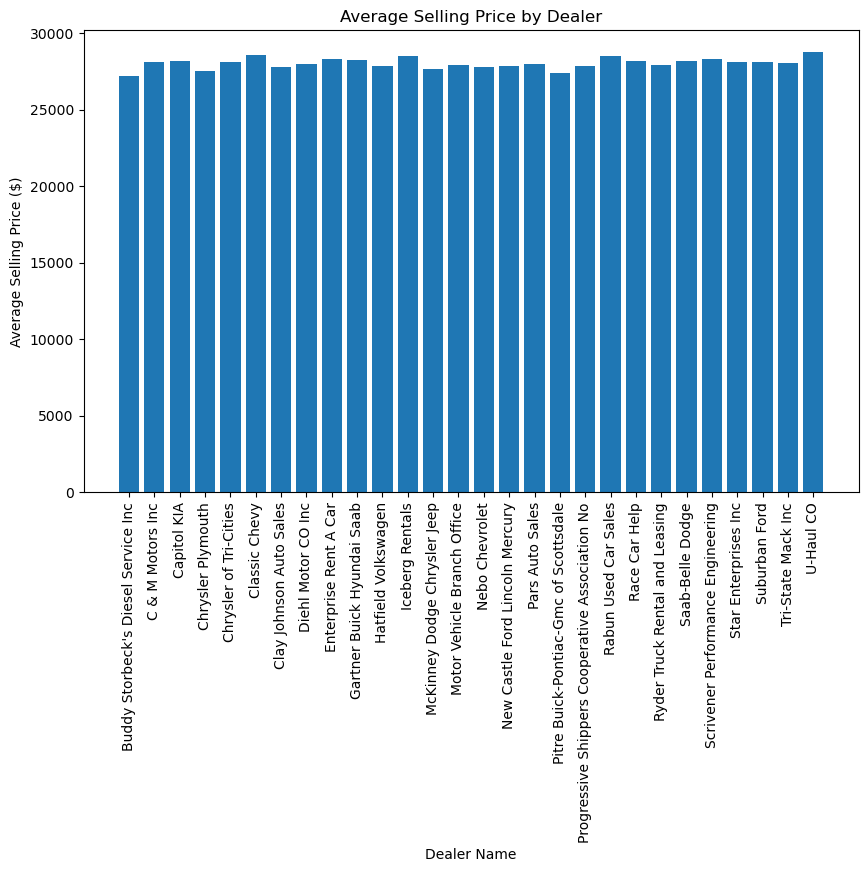

In [64]:
##Q1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df1.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
print(avg_price_by_dealer)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_dealer['Dealer_Name'], avg_price_by_dealer['Price ($)'])
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price by Dealer')
plt.xticks(rotation=90)
plt.show()




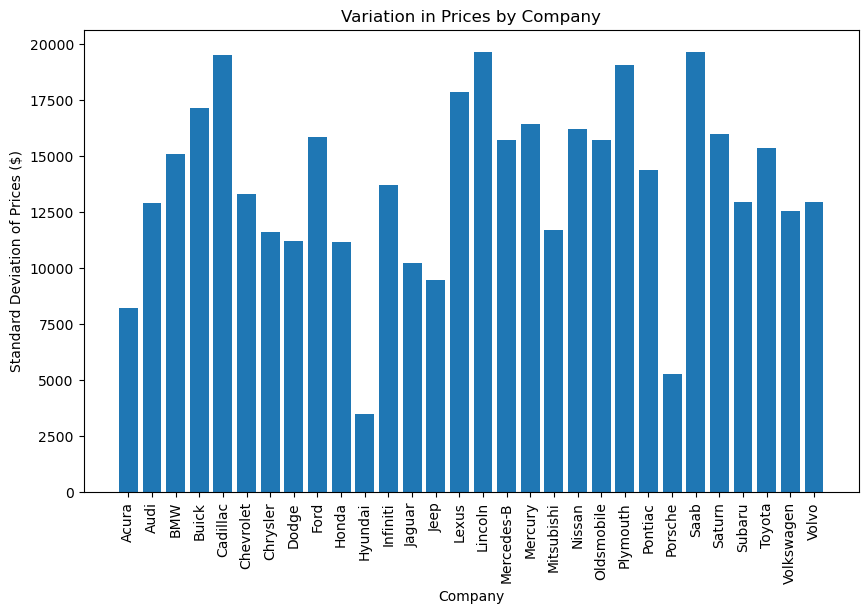

In [67]:
##Q2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
price_std_dev = df1.groupby('Company')['Price ($)'].std().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(price_std_dev['Company'], price_std_dev['Price ($)'])
plt.xlabel('Company')
plt.ylabel('Standard Deviation of Prices ($)')
plt.title('Variation in Prices by Company')
plt.xticks(rotation=90)
plt.show()


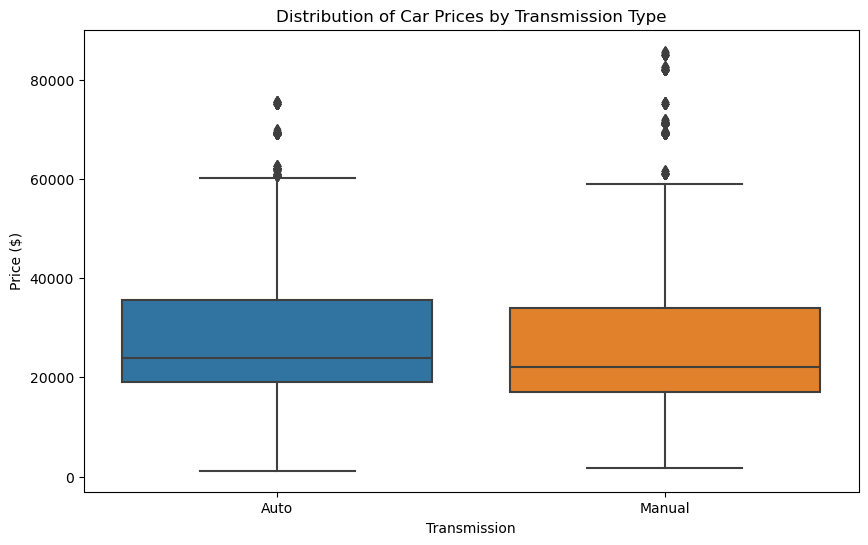

                 0.25     0.75      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


In [70]:
##Q3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
price_stats = df1.groupby('Transmission')['Price ($)'].describe().reset_index()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()
iqr_values = df1.groupby('Transmission')['Price ($)'].quantile([0.25, 0.75]).unstack()
iqr_values['IQR'] = iqr_values[0.75] - iqr_values[0.25]
print(iqr_values)


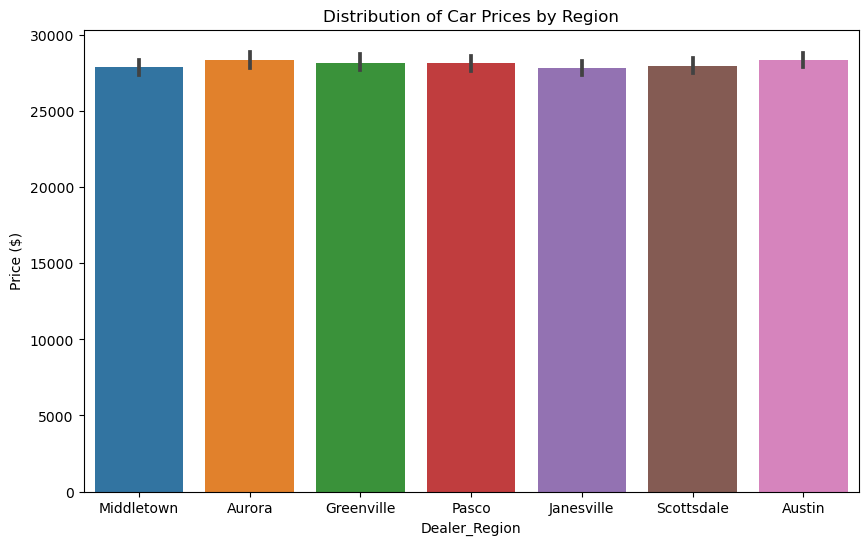

In [85]:
##Q4 What is the distribution of car prices across different regions?
plt.figure(figsize=(10, 6))
sns.barplot(x='Dealer_Region', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices by Region')
plt.xticks(rotation=0)
plt.show()

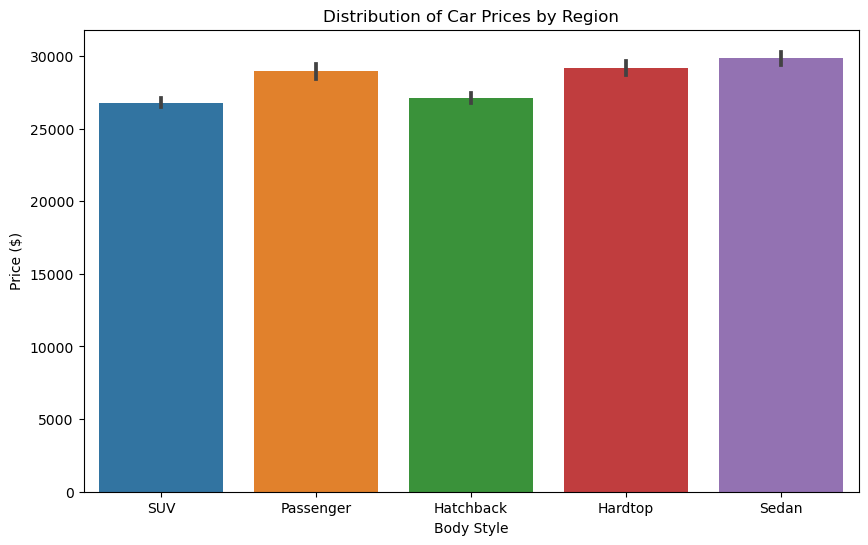

In [87]:
##Q5 What is the distribution of cars based on body styles?
plt.figure(figsize=(10, 6))
sns.barplot(x='Body Style', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices by Region')
plt.xticks(rotation=360)
plt.show()

 

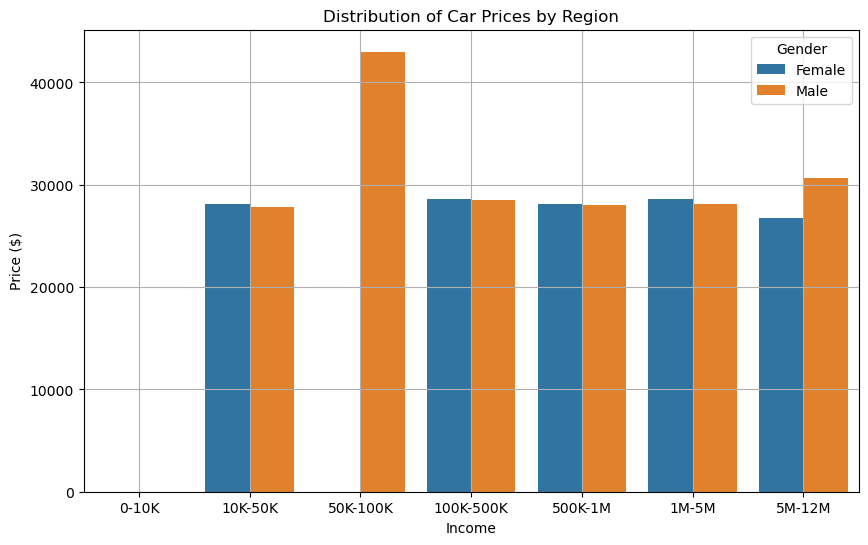

In [26]:
##Q6 How does the average selling price of cars vary by customer gender and annual income?
bins = [0, 10000, 50000, 100000, 500000, 1000000, 5000000, 12000000]
labels = ["0-10K", "10K-50K", "50K-100K", "100K-500K", "500K-1M", "1M-5M", "5M-12M"]
df1['Income'] = pd.cut(df1['Annual Income'], bins=bins, labels=labels, right=True)
grouped_df = df1.groupby(["Gender", "Income"])["Price ($)"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Income', y='Price ($)', hue="Gender", data=grouped_df)
plt.title('Distribution of Car Prices by Region')
plt.xticks(rotation=360)
plt.grid()
plt.show()



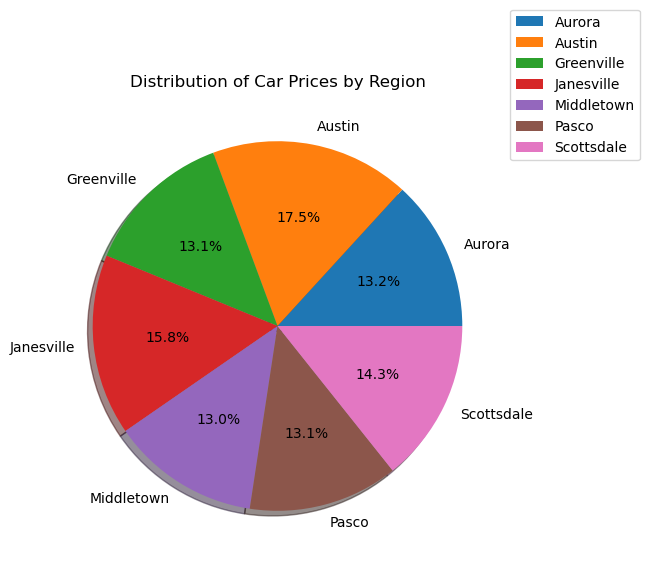

In [49]:
##Q7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?
price_by_region = df1.groupby('Dealer_Region')['Price ($)'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.pie(price_by_region['Price ($)'], labels=price_by_region['Dealer_Region'], autopct="%1.1f%%",shadow=True)
plt.title('Distribution of Car Prices by Region')
plt.legend(loc='best',bbox_to_anchor=(1.3, 1.2), fontsize=10 )
plt.show()


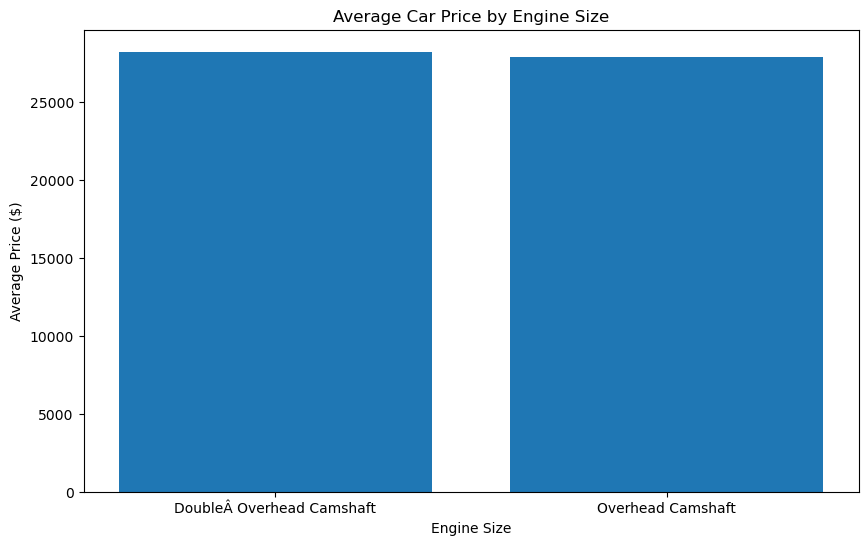

In [7]:
##Q8 How does the average car price differ between cars with different engine sizes?
avg_price_by_engine_size = df1.groupby('Engine')['Price ($)'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_engine_size['Engine'], avg_price_by_engine_size['Price ($)'])
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.title('Average Car Price by Engine Size')
plt.show()


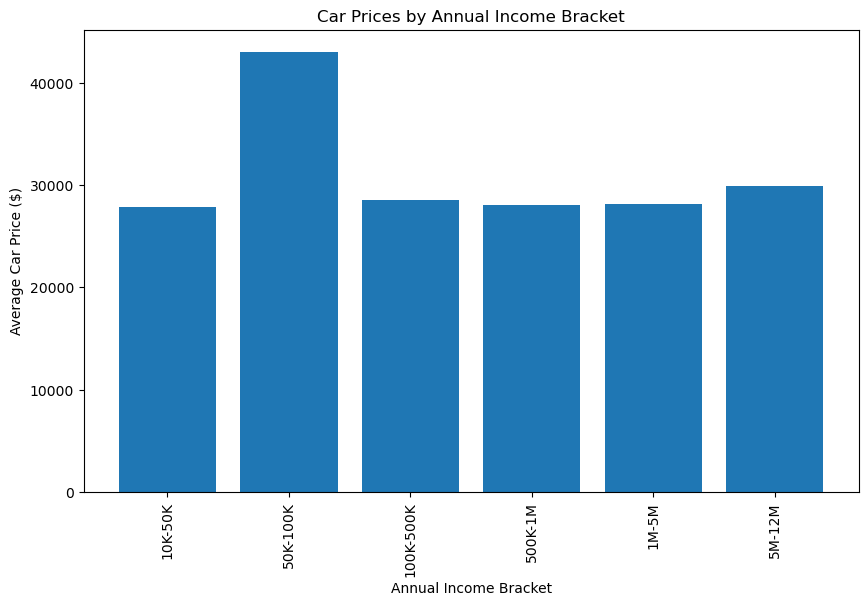

In [23]:
##Q9 How do car prices vary based on the customer’s annual income bracket?
bins = [0, 10000, 50000, 100000, 500000, 1000000, 5000000, 12000000]
labels = ["0-10K", "10K-50K", "50K-100K", "100K-500K", "500K-1M", "1M-5M", "5M-12M"]

df1['Income'] = pd.cut(df1['Annual Income'], bins=bins, labels=labels, right=True)

# Calculate the average price for each income bracket
avg_price_by_income_bracket = df1.groupby("Income")["Price ($)"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_income_bracket['Income'], avg_price_by_income_bracket['Price ($)'])
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.title('Car Prices by Annual Income Bracket')
plt.xticks(rotation=90)
plt.show()






        Model  Number of Sales
0    Diamante              418
1  Silhouette              411
2       Prizm              411
3      Passat              391
4  Ram Pickup              383


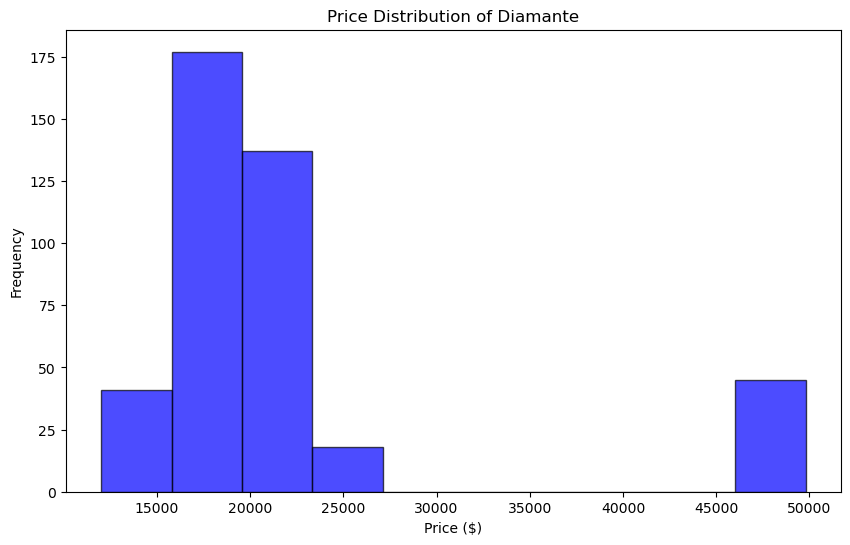

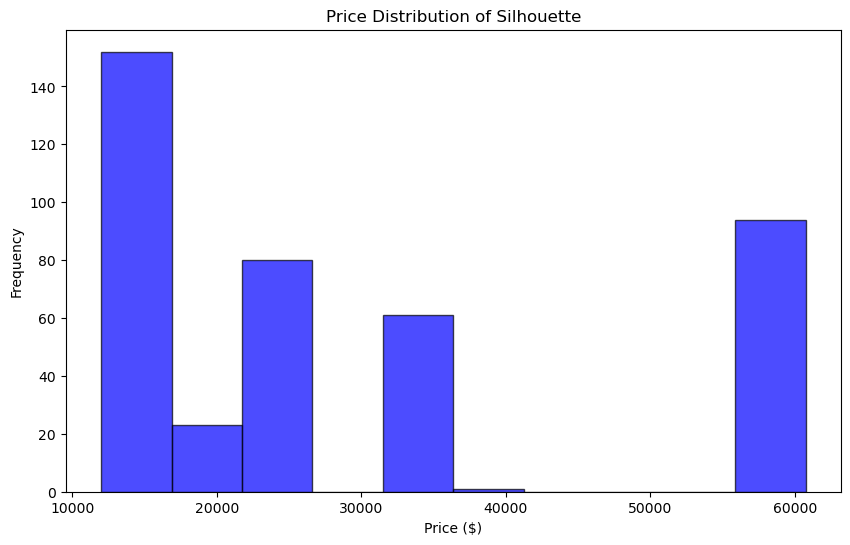

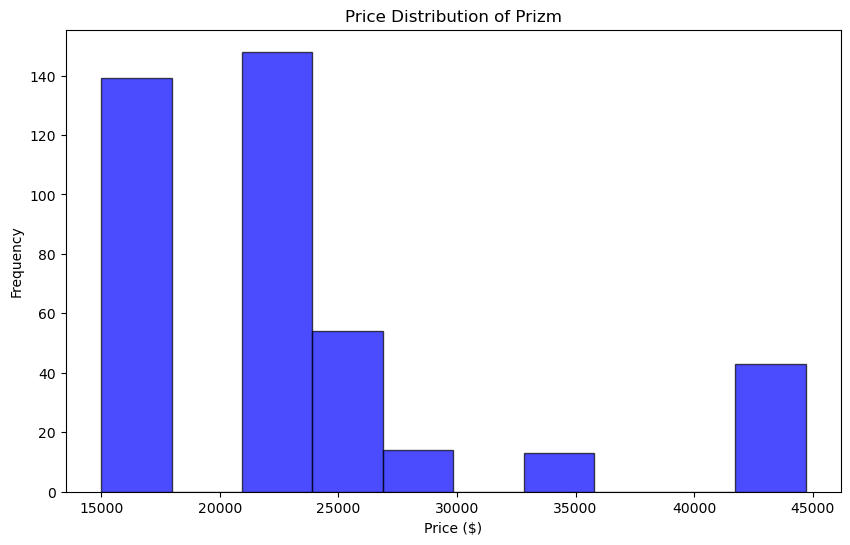

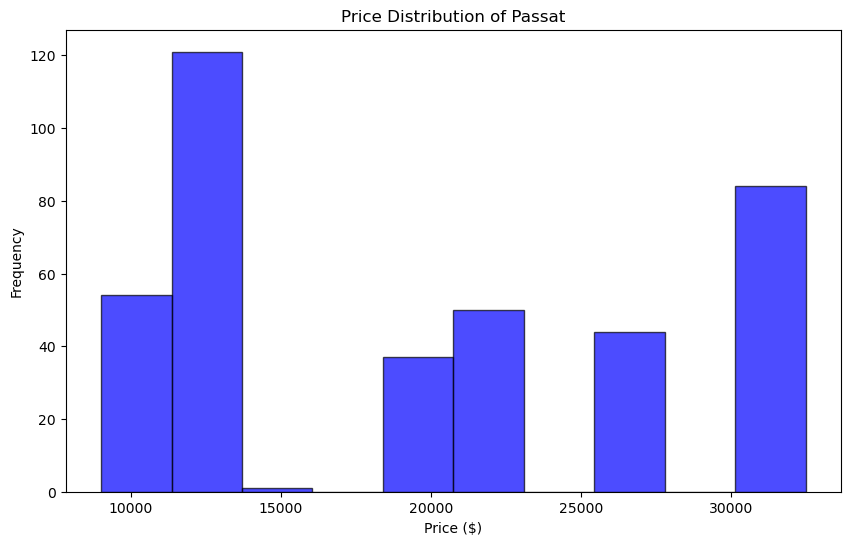

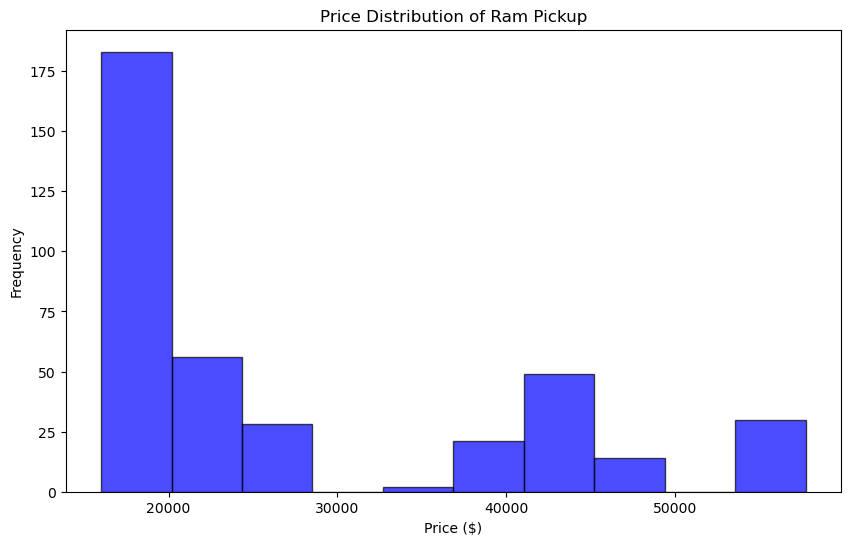

In [26]:
##Q10 What are the top 5 car models with the highest number of sales, and how does their price distribution look?
sales_by_model = df1['Model'].value_counts().reset_index()
sales_by_model.columns = ['Model', 'Number of Sales']
top_5_models = sales_by_model.nlargest(5, 'Number of Sales')
print(top_5_models)
for model in top_5_models['Model']:
    model_df = df1[df1['Model'] == model]
    plt.figure(figsize=(10, 6))
    plt.hist(model_df['Price ($)'], bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')
    plt.title(f'Price Distribution of {model}')
    plt.show()


In [14]:
##Q11 How does car price vary with engine size across different car colors, and which colors have the highest price
#variation?
price_variation_by_color = df1.groupby('Color')['Price ($)'].std().reset_index()
price_variation_by_color.columns = ['Color', 'Price Variation']
price_variation_by_color = price_variation_by_color.sort_values('Price Variation', ascending=False)
price_variation_by_color.head().reset_index()


,index,Color,Price Variation
0,2,Red,15519.360962
1,0,Black,15286.065976
2,1,Pale White,14077.346859


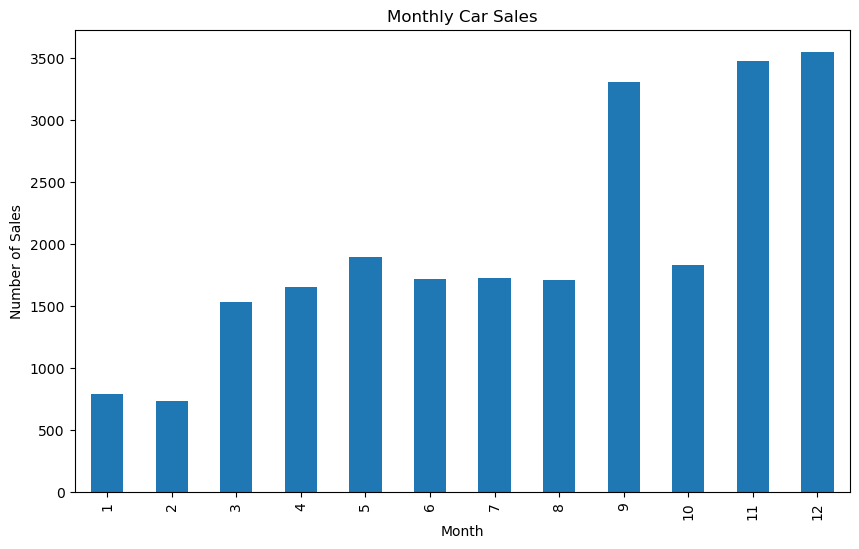

In [8]:
##Q12 Is there any seasonal trend in car sales based on the date of sale?
@@Yes
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date'].dt.month
monthly_sales = df1.groupby('Month').size()  # For count of sales
# or for revenue analysis, assuming 'Price ($)' is the sale price:
monthly_revenue = df1.groupby('Month')['Price ($)'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                           

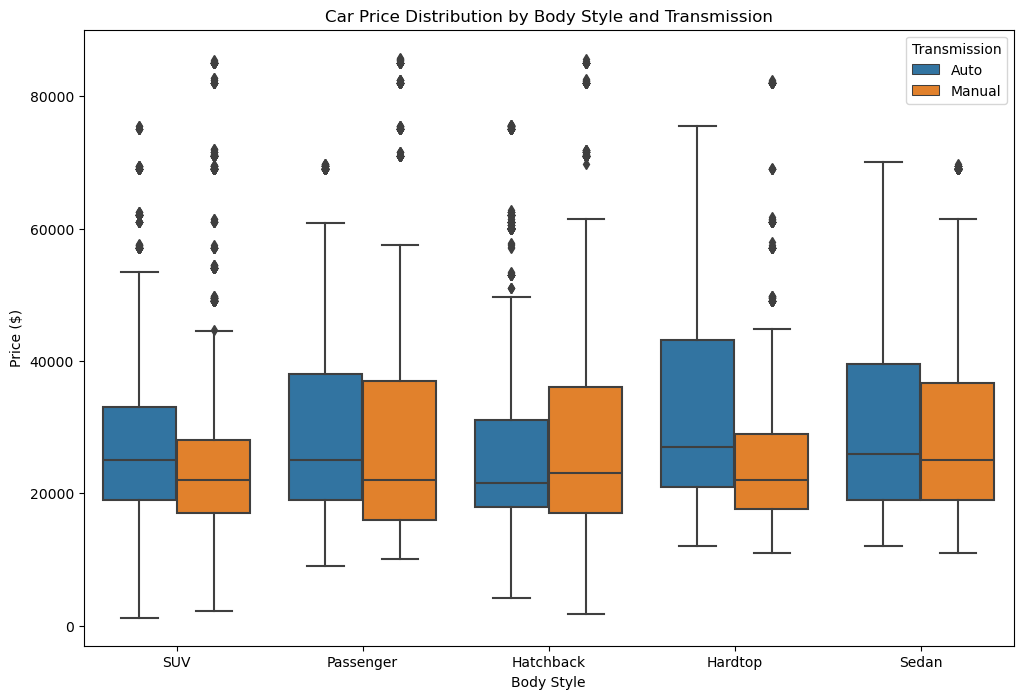

In [9]:
#Q13 How does the car price distribution change when considering different combinations of body style and
#####transmission type?
grouped_stats = df1.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
print(grouped_stats)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df1)
plt.title('Car Price Distribution by Body Style and Transmission')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.legend(title='Transmission')
plt.show()


               Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


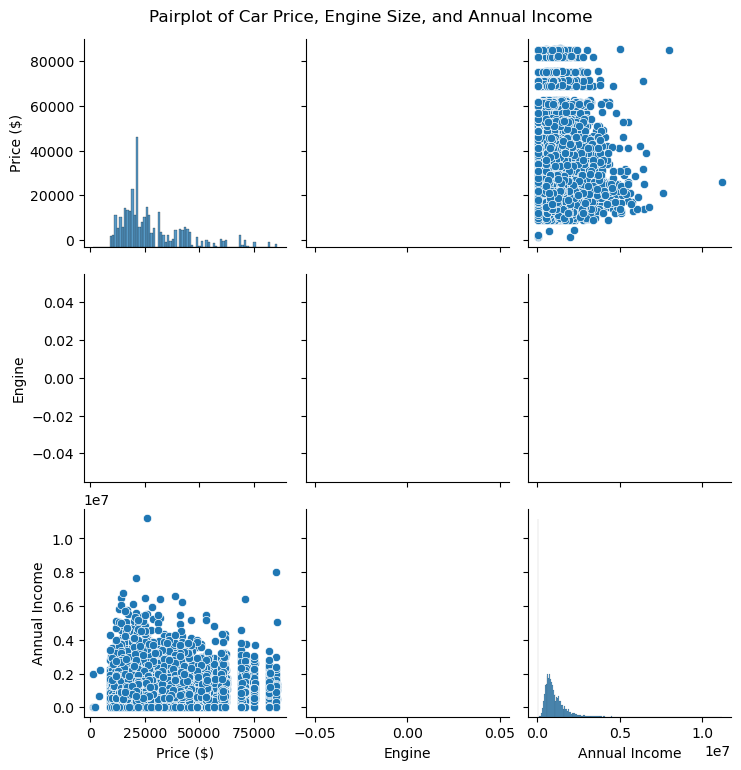

In [13]:
##Q14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df1['Price ($)'] = pd.to_numeric(df1['Price ($)'], errors='coerce')
df1['Engine'] = pd.to_numeric(df1['Engine'], errors='coerce')
df1['Annual Income'] = pd.to_numeric(df1['Annual Income'], errors='coerce')

correlation_matrix = df1[['Price ($)', 'Engine', 'Annual Income']].corr()
print(correlation_matrix)

sns.pairplot(df1[['Price ($)', 'Engine', 'Annual Income']])
plt.suptitle("Pairplot of Car Price, Engine Size, and Annual Income", y=1.02)
plt.show()




        Model                     Engine     Price ($)
212        SC          Overhead Camshaft  61074.818182
198    Ranger  DoubleÂ Overhead Camshaft  61064.055556
222     Sable          Overhead Camshaft  61039.770833
56     Catera  DoubleÂ Overhead Camshaft  56836.933333
143     LX470          Overhead Camshaft  54037.490196
..        ...                        ...           ...
15         A4          Overhead Camshaft  12046.220000
241    Taurus  DoubleÂ Overhead Camshaft  11665.538462
98     Escort          Overhead Camshaft  11403.866667
129  Intrepid          Overhead Camshaft  11069.882353
155    Mirage  DoubleÂ Overhead Camshaft   9063.368421

[261 rows x 3 columns]


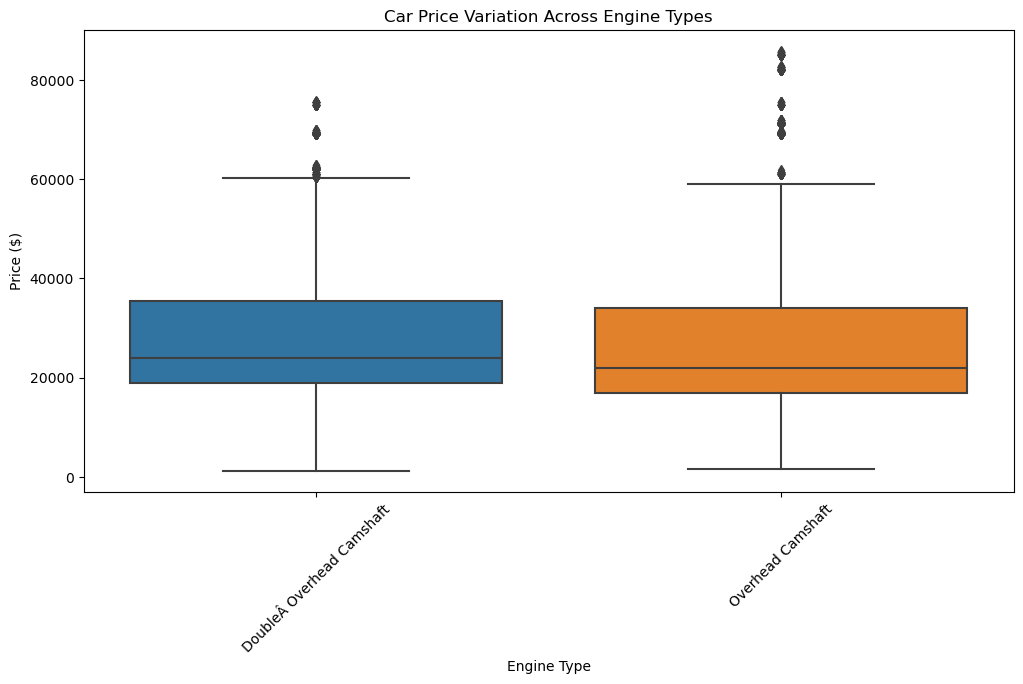

In [114]:
##Q15 How does the average car price vary across different car models and engine types?

# Group by Model and Engine Type, then compute the average price
avg_price = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Sort by highest average price
avg_price = avg_price.sort_values(by='Price ($)',ascending=False)

# Display the top results
print(avg_price)  # Shows the top  most expensive models based on engine type

plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', data=df1)
plt.xlabel("Engine Type")
plt.ylabel("Price ($)")
plt.title("Car Price Variation Across Engine Types")
plt.xticks(rotation=45)
plt.show()


In [ ]:
                                                        ### EDA3 AMAZON SALES DATA

In [14]:
df2=pd.read_csv("amazon.csv")

In [71]:
df2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59%,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280,3045,25%,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazo

In [74]:
##Q1 What is the average rating for each product category?
average_rating_by_category = df2.groupby('category')['rating'].mean().reset_index()
average_rating_by_category


,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [80]:
##Q2 What are the top rating_count products by category?

top_products_by_category = df2.loc[df2.groupby('category')['rating_count'].idxmax()].reset_index()

# Print the top products by category
print(top_products_by_category[['category', 'product_name', 'rating_count']])



                                              category  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...   
1    Computers&Accessories|Accessories&Peripherals|...   
2    Computers&Accessories|Accessories&Peripherals|...   
3    Computers&Accessories|Accessories&Peripherals|...   
4    Computers&Accessories|Accessories&Peripherals|...   
..                                                 ...   
206  OfficeProducts|OfficePaperProducts|Paper|Stati...   
207  OfficeProducts|OfficePaperProducts|Paper|Stati...   
208  OfficeProducts|OfficePaperProducts|Paper|Stati...   
209  OfficeProducts|OfficePaperProducts|Paper|Stati...   
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                          product_name  rating_count  
0    Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
1    rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4426.0  
2    Hp Wired On Ear Headphones With Mic With 3.5 M...        7222.0  
3    JBL Commercial

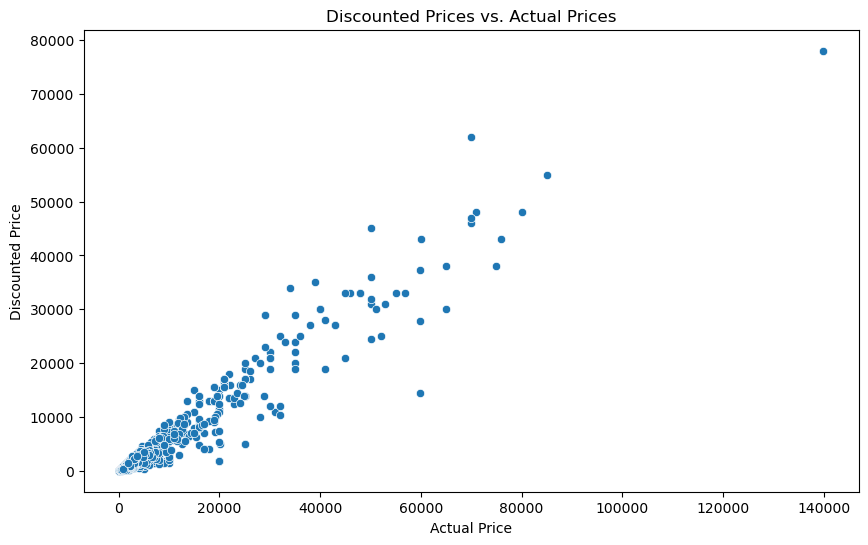

In [82]:
##Q3 What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df2)
plt.title('Discounted Prices vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()


                                              category  discount_percentage
106  Electronics|Mobiles&Accessories|MobileAccessor...            90.090090
75   Electronics|Headphones,Earbuds&Accessories|Ear...            90.090090
6    Computers&Accessories|Accessories&Peripherals|...            90.090090
73   Electronics|Headphones,Earbuds&Accessories|Ada...            87.987988
14   Computers&Accessories|Accessories&Peripherals|...            87.722505
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...             0.000000
121  Home&Kitchen|CraftMaterials|DrawingMaterials|D...             0.000000
81   Electronics|HomeAudio|MediaStreamingDevices|St...             0.000000
62    Electronics|Cameras&Photography|Accessories|Film             0.000000
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...             0.000000

[211 rows x 2 columns]


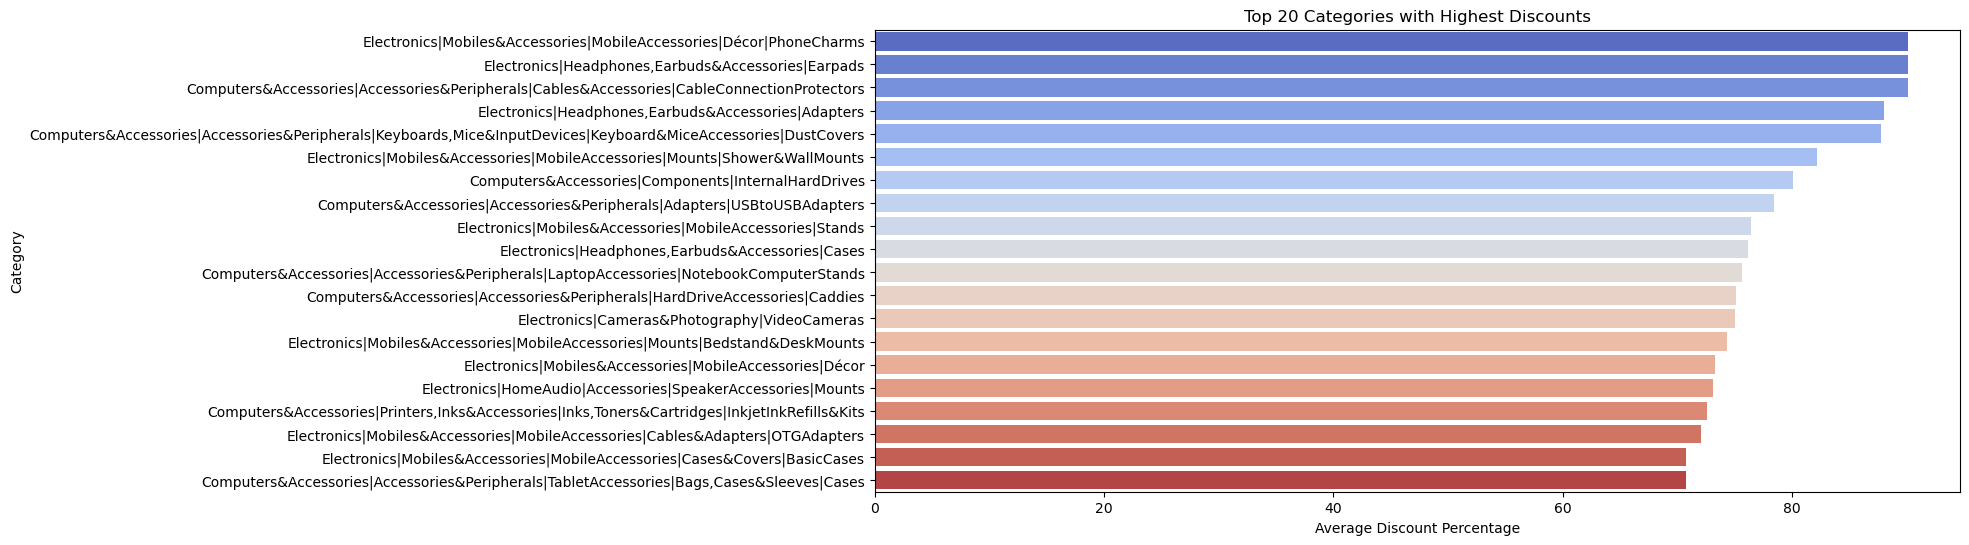

In [113]:
##Q4 How does the average discount percentage vary across categories?
# Group by category and compute the average discount percentage
avg_discount = df2.groupby('category')['discount_percentage'].mean().reset_index()

# Sort by highest discount
avg_discount = avg_discount.sort_values(by='discount_percentage', ascending=False)

# Display the top 10 categories with the highest discounts
print(avg_discount)

plt.figure(figsize=(14,6))
top_20 = avg_discount.head(20)  # Select top 20 categories
sns.barplot(x='discount_percentage', y='category', data=top_20, palette='coolwarm')

plt.xlabel("Average Discount Percentage")
plt.ylabel("Category")
plt.title("Top 20 Categories with Highest Discounts")
plt.show()



In [89]:
##Q5 What are the most popular product names?
product_name_counts = df2['product_name'].value_counts().reset_index()

# Print the top 10 most popular product names
print("Top Most Popular Product Names:")
print(product_name_counts)



Top Most Popular Product Names:
                                           product_name  count
0     Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...      5
1     Fire-Boltt Phoenix Smart Watch with Bluetooth ...      4
2     Wayona Nylon Braided USB to Lightning Fast Cha...      3
3     MI Braided USB Type-C Cable for Charging Adapt...      3
4     Amazonbasics Nylon Braided Usb-C To Lightning ...      3
...                                                 ...    ...
1332   SanDisk Ultra microSD UHS-I Card 64GB, 120MB/s R      1
1333  Noise ColorFit Ultra SE Smart Watch with 1.75"...      1
1334                            Nokia 150 (2020) (Cyan)      1
1335  OnePlus 10T 5G (Moonstone Black, 8GB RAM, 128G...      1
1336  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...      1

[1337 rows x 2 columns]


In [92]:
##Q6 What are the most popular product keywords?
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already present
nltk.download('stopwords')
nltk.download('punkt') 
# Combine text fields for keyword extraction
text_data = df2['product_name'].astype(str) + " " + df2['category'].astype(str) + " " + df2['about_product'].astype(str) + " " + df2['review_content'].astype(str)

# Preprocess text: Lowercasing and removing special characters
text_data = text_data.str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Tokenization
all_words = [word for text in text_data for word in word_tokenize(text)]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word not in stop_words]

# Count most common words
word_counts = Counter(filtered_words)

# Get top 20 keywords
top_keywords = word_counts.most_common(20)

# Display results
print("Most Popular Product Keywords:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vipin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vipin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Most Popular Product Keywords:
good: 4587
product: 3175
cable: 2472
quality: 2382
use: 1967
usb: 1769
charging: 1743
one: 1490
also: 1376
like: 1333
easy: 1214
phone: 1187
price: 1160
battery: 1153
tv: 1107
fast: 1086
watch: 1074
using: 1046
time: 1033
power: 985


In [94]:
##Q7 What are the most popular product reviews?
# Sort by rating_count in descending order
most_reviewed = df2.sort_values(by='rating_count', ascending=False).reset_index()

# Display top 10 most reviewed products
print(most_reviewed[['product_name', 'rating', 'rating_count']].head(10))


                                        product_name  rating  rating_count
0  AmazonBasics Flexible Premium HDMI Cable (Blac...     4.4      426973.0
1  Amazon Basics High-Speed HDMI Cable, 6 Feet (2...     4.4      426973.0
2  Amazon Basics High-Speed HDMI Cable, 6 Feet - ...     4.4      426973.0
3  AmazonBasics Flexible Premium HDMI Cable (Blac...     4.4      426972.0
4  boAt Bassheads 100 in Ear Wired Earphones with...     4.1      363713.0
5  boAt Bassheads 100 in Ear Wired Earphones with...     4.1      363713.0
6  boAt BassHeads 100 in-Ear Wired Headphones wit...     4.1      363711.0
7  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...     4.1      313836.0
8  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...     4.1      313836.0
9  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...     4.1      313832.0


In [97]:
##Q8 What is the correlation between discounted_price and rating?
correlation = df2['discounted_price'].corr(df2['rating'])

print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")


Correlation between Discounted Price and Rating: 0.12


In [99]:
##Q9 What are the Top 5 categories based on the highest rating?
# Group by category and compute the average rating
category_ratings = df2.groupby('category')['rating'].mean().reset_index()

# Sort categories by rating in descending order
top_categories = category_ratings.sort_values(by='rating', ascending=False).head(5)

# Display results
print(top_categories)


                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
196  OfficeProducts|OfficeElectronics|Calculators|B...     4.5


In [ ]:
##Q10 Identify any potential areas for improvement or optimization based on the data analysis?
Based on our analysis of product ratings, reviews, and pricing, here are some key areas for improvement and optimization for better
product performance and customer satisfaction:

1. Pricing Strategy Optimization
   Issue: Weak or No Correlation Between Discounted Price & Rating
   If discounted products have lower ratings, customers might perceive them as low quality.
   If there’s no correlation, discounts might not be influencing customer satisfaction.

2. Product Quality & Review Optimization
   Issue: Categories with High Sales but Low Ratings
   If popular categories (e.g., chargers, power banks) have lower ratings, quality issues or unrealistic expectations might be the cause.

3. Review Engagement & Sentiment Improvement
   Issue: Many Reviews but Low Average Rating
   Some products may have high review counts but low ratings, signaling customer dissatisfaction.

4. Category-Specific Improvements
   Issue: Some Categories Have High Ratings but Low Sales
   Example: DSLR Cameras & High-End Laptops might have great ratings but low sales due to price.

5. Customer Retention & Personalization
   Issue: Lack of Repeat Buyers or Low Review Engagement
   If customers aren’t returning or engaging in reviews, they may not feel valued.


In [ ]:
                                                            ########EDA4 SPOTIFY DATA

In [15]:
df3=pd.read_csv("spotify.csv")

In [6]:
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [12]:
##Q1  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needful?
duplicate_count=df3.duplicated().sum()
if duplicate_count > 0:
    df3.drop_duplicates(inplace=True)


In [10]:
df3.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [13]:
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


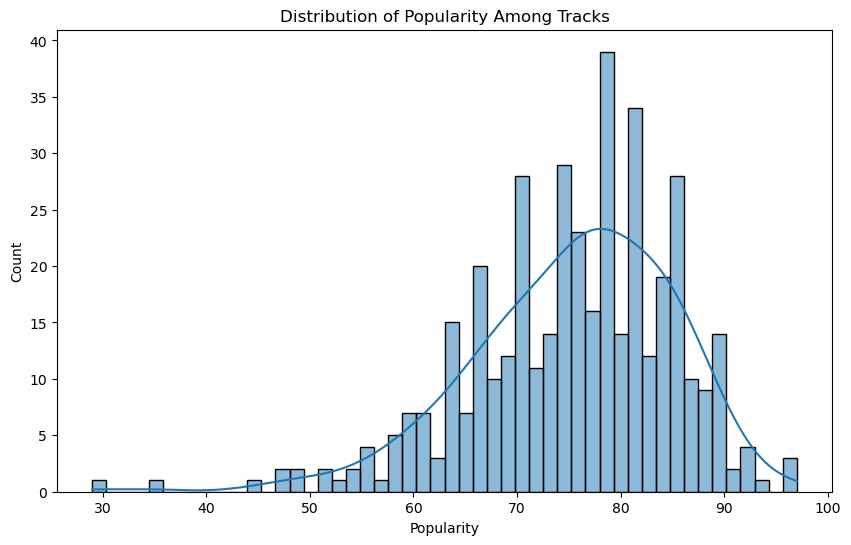

In [18]:
##Q2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
plt.figure(figsize=(10, 6))
sns.histplot(df3['Popularity'], kde=True, bins=50)
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


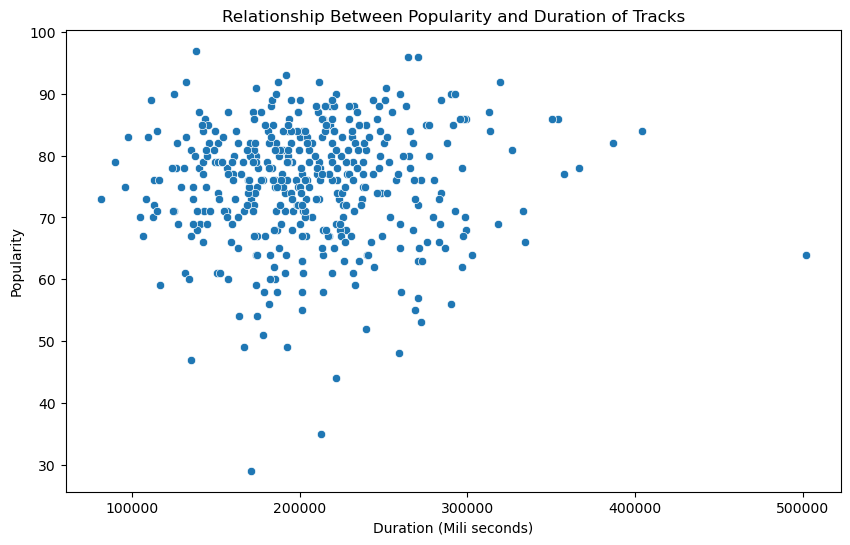

In [21]:
##Q3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df3)
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (Mili seconds)')
plt.ylabel('Popularity')
plt.show()

## RELATIONSHIP-indicate that shorter tracks tend to be more popular.


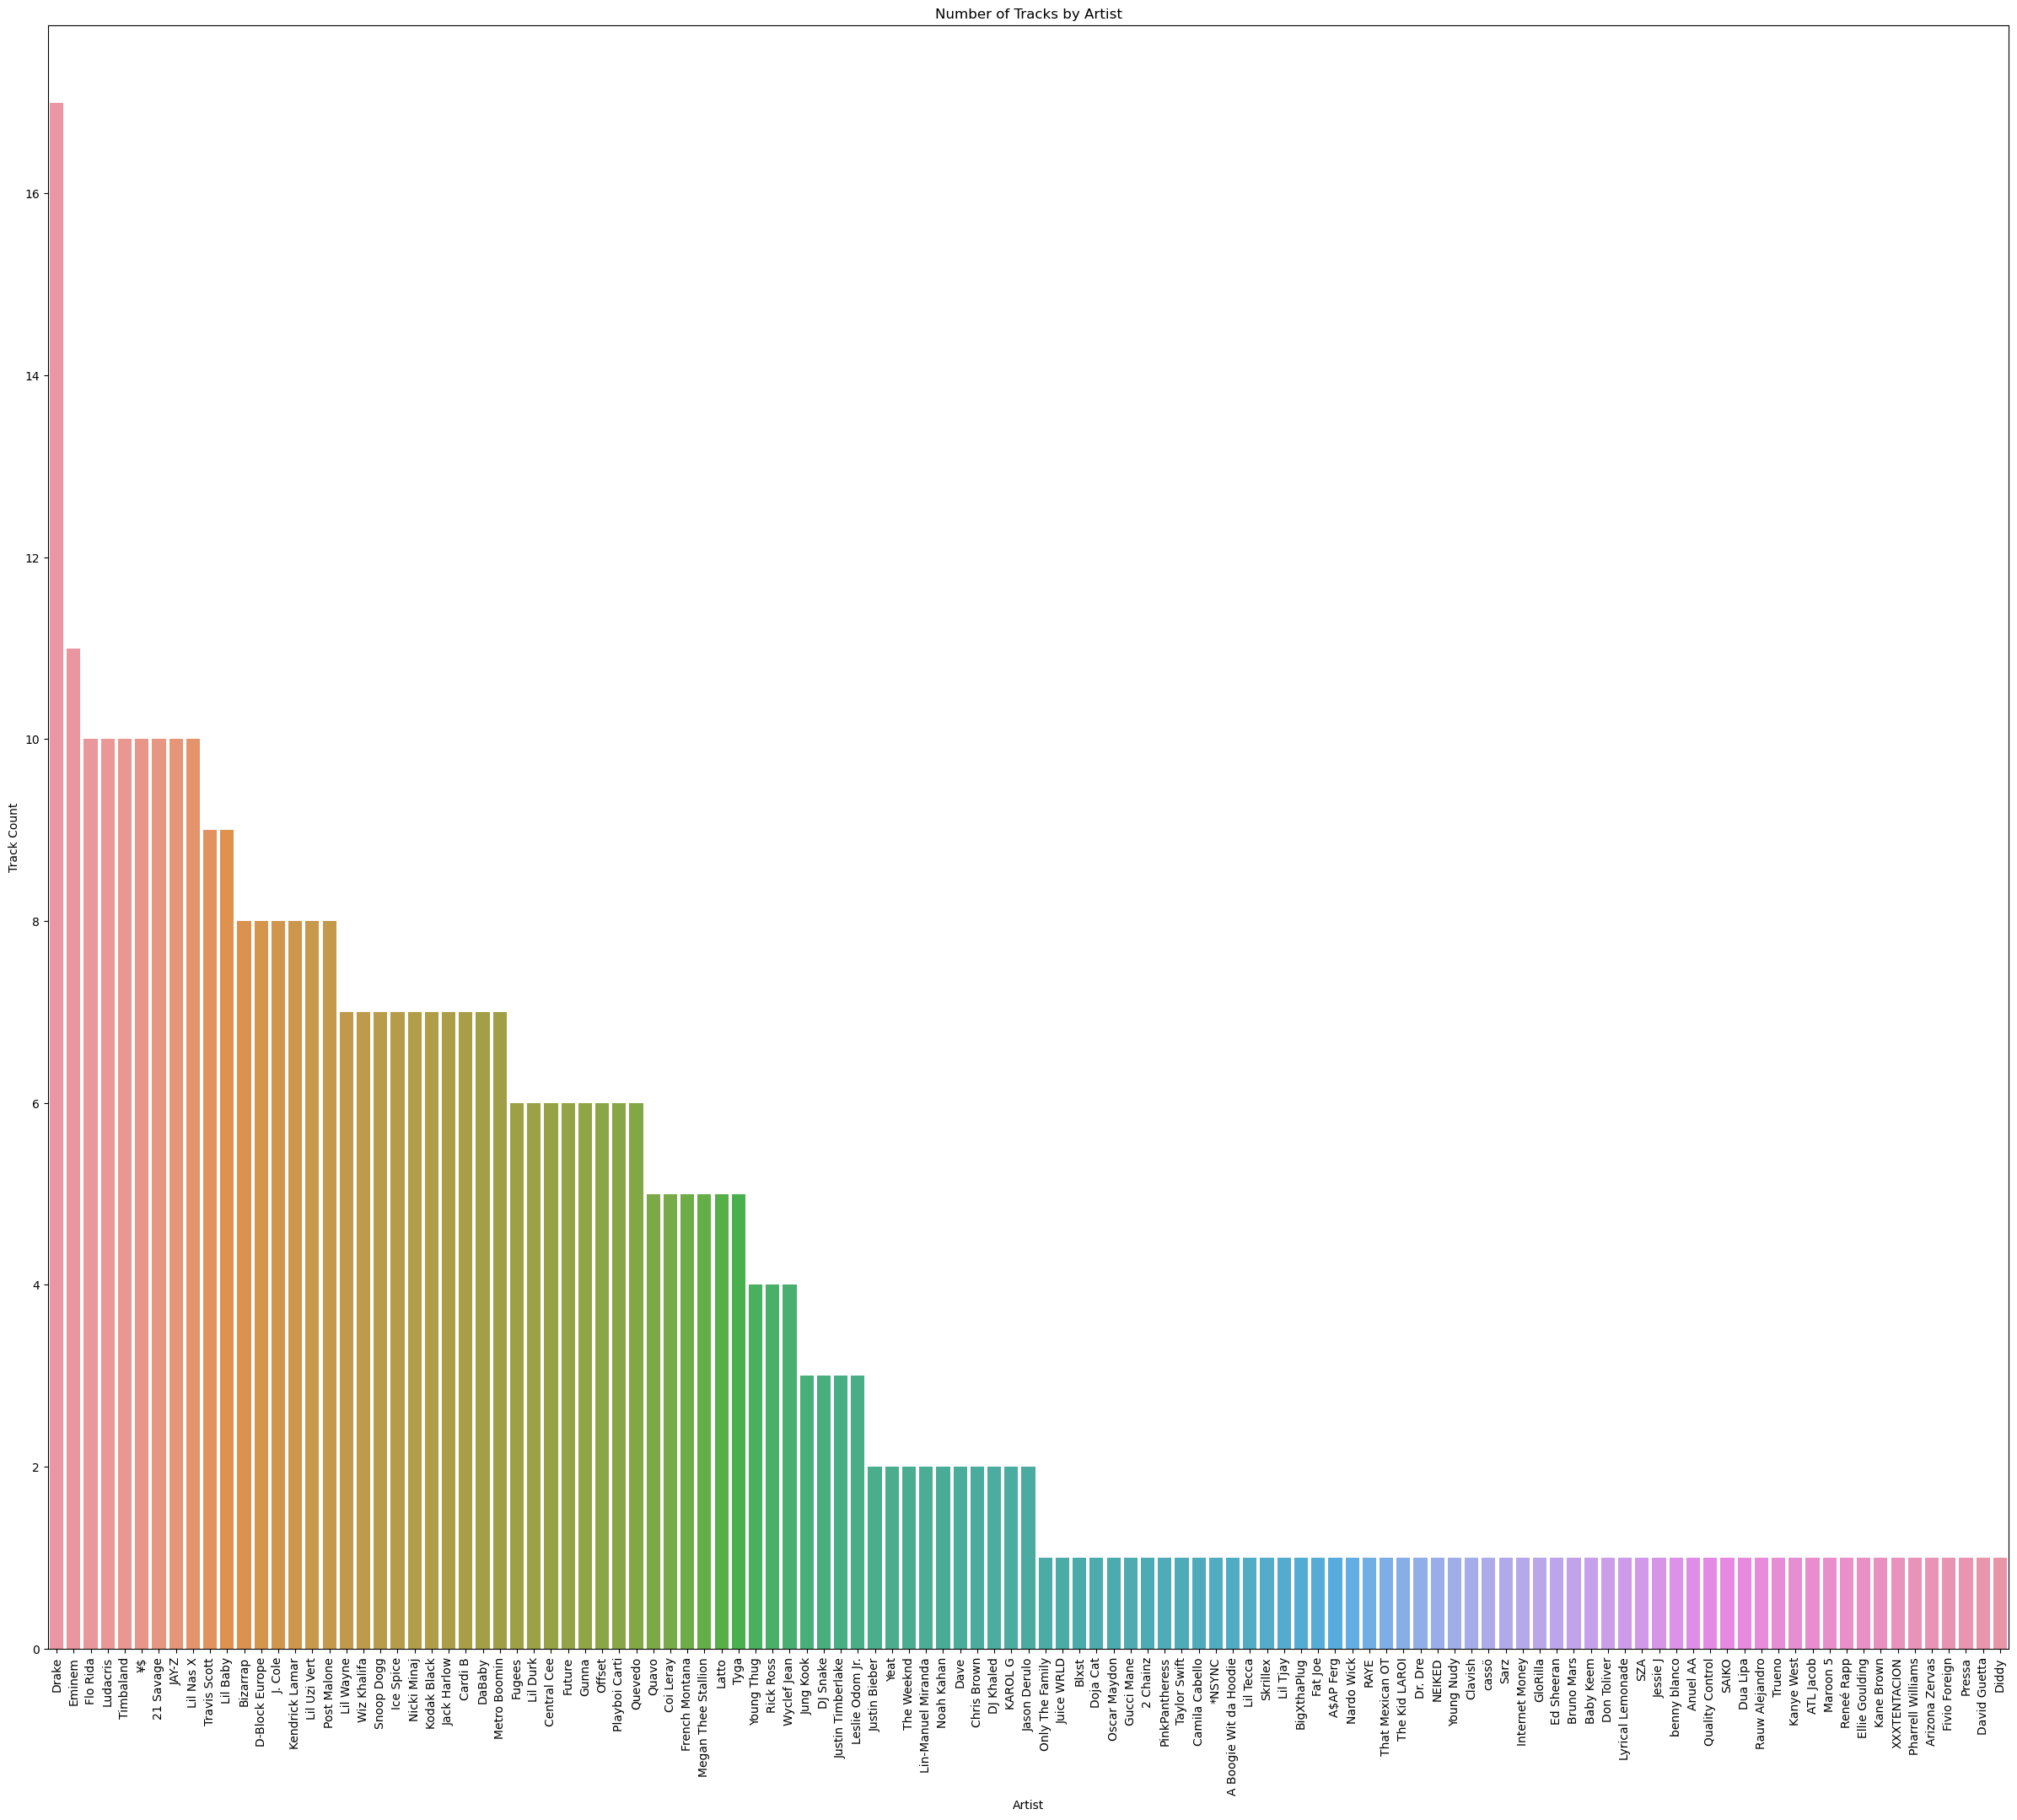

In [116]:
##Q4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
##a countplot?
artist_track_count = df3['Artist'].value_counts().reset_index()
artist_track_count.columns = ['Artist', 'track_count']

# Create a countplot
plt.figure(figsize=(30,25))
sns.countplot(x='Artist', data=df3, order=artist_track_count['Artist'])
plt.title('Number of Tracks by Artist')
plt.xlabel('Artist')
plt.ylabel('Track Count')
plt.xticks(rotation=90)
plt.show()


In [38]:
##Q5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
least_popular_tracks = df3.sort_values(by='Popularity').head(5)

# Print the artist name and track name for each of the top 5 least popular tracks
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])



             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [39]:
##Q6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity
     #for each artist
#Group the data by artist and calculate the average popularity
artist_avg_popularity = df3.groupby('Artist')['Popularity'].mean().reset_index()

# Sort the artists by average popularity in descending order
artist_avg_popularity = artist_avg_popularity.sort_values(by='Popularity', ascending=False)

# Select the top 5 most popular artists
top_5_artists = artist_avg_popularity.head(5)

# Print the top 5 most popular artists and their average popularity
print(top_5_artists)


           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   86.555556
114            ¥$   85.100000


In [53]:
##Q7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?
#Get the top 5 most popular artists
top_5_artists = artist_avg_popularity['Artist'].head(5)

# Initialize an empty list to store the most popular tracks
most_popular_tracks = []

# Loop through each of the top 5 artists
for artist in top_5_artists:
    # Filter the data to get the tracks by the current artist
    artist_tracks = df3[df3['Artist'] == artist]
    
    # Get the most popular track by the current artist
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]['Track Name']
    
    # Append the most popular track to the list
    most_popular_tracks.append((artist, most_popular_track))

# Print the most popular tracks for the top 5 artists
for artist, track in most_popular_tracks:
    print(f"Artist: {artist}, Most Popular Track: {track}")


Artist: cassö, Most Popular Track: Prada
Artist: Trueno, Most Popular Track: Mamichula - con Nicki Nicole
Artist: David Guetta, Most Popular Track: Baby Don't Hurt Me
Artist: Travis Scott, Most Popular Track: FE!N (feat. Playboi Carti)
Artist: ¥$, Most Popular Track: CARNIVAL


<Figure size 1000x800 with 0 Axes>

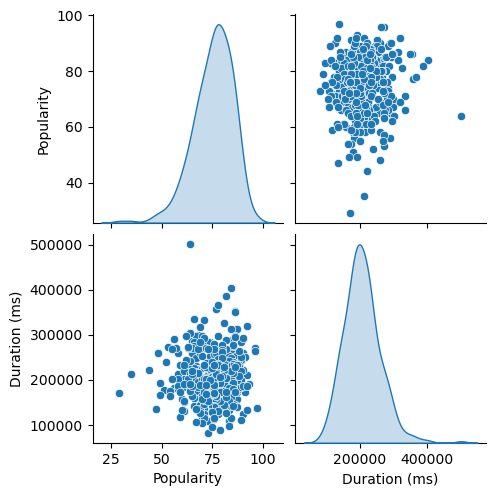

In [58]:
##Q8 Visualize relationships between multiple numerical variables simultaneously using a pair plot?
numerical_cols = ['Popularity', 'Duration (ms)']

# Create a pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(df3[numerical_cols], diag_kind='kde')
plt.show()



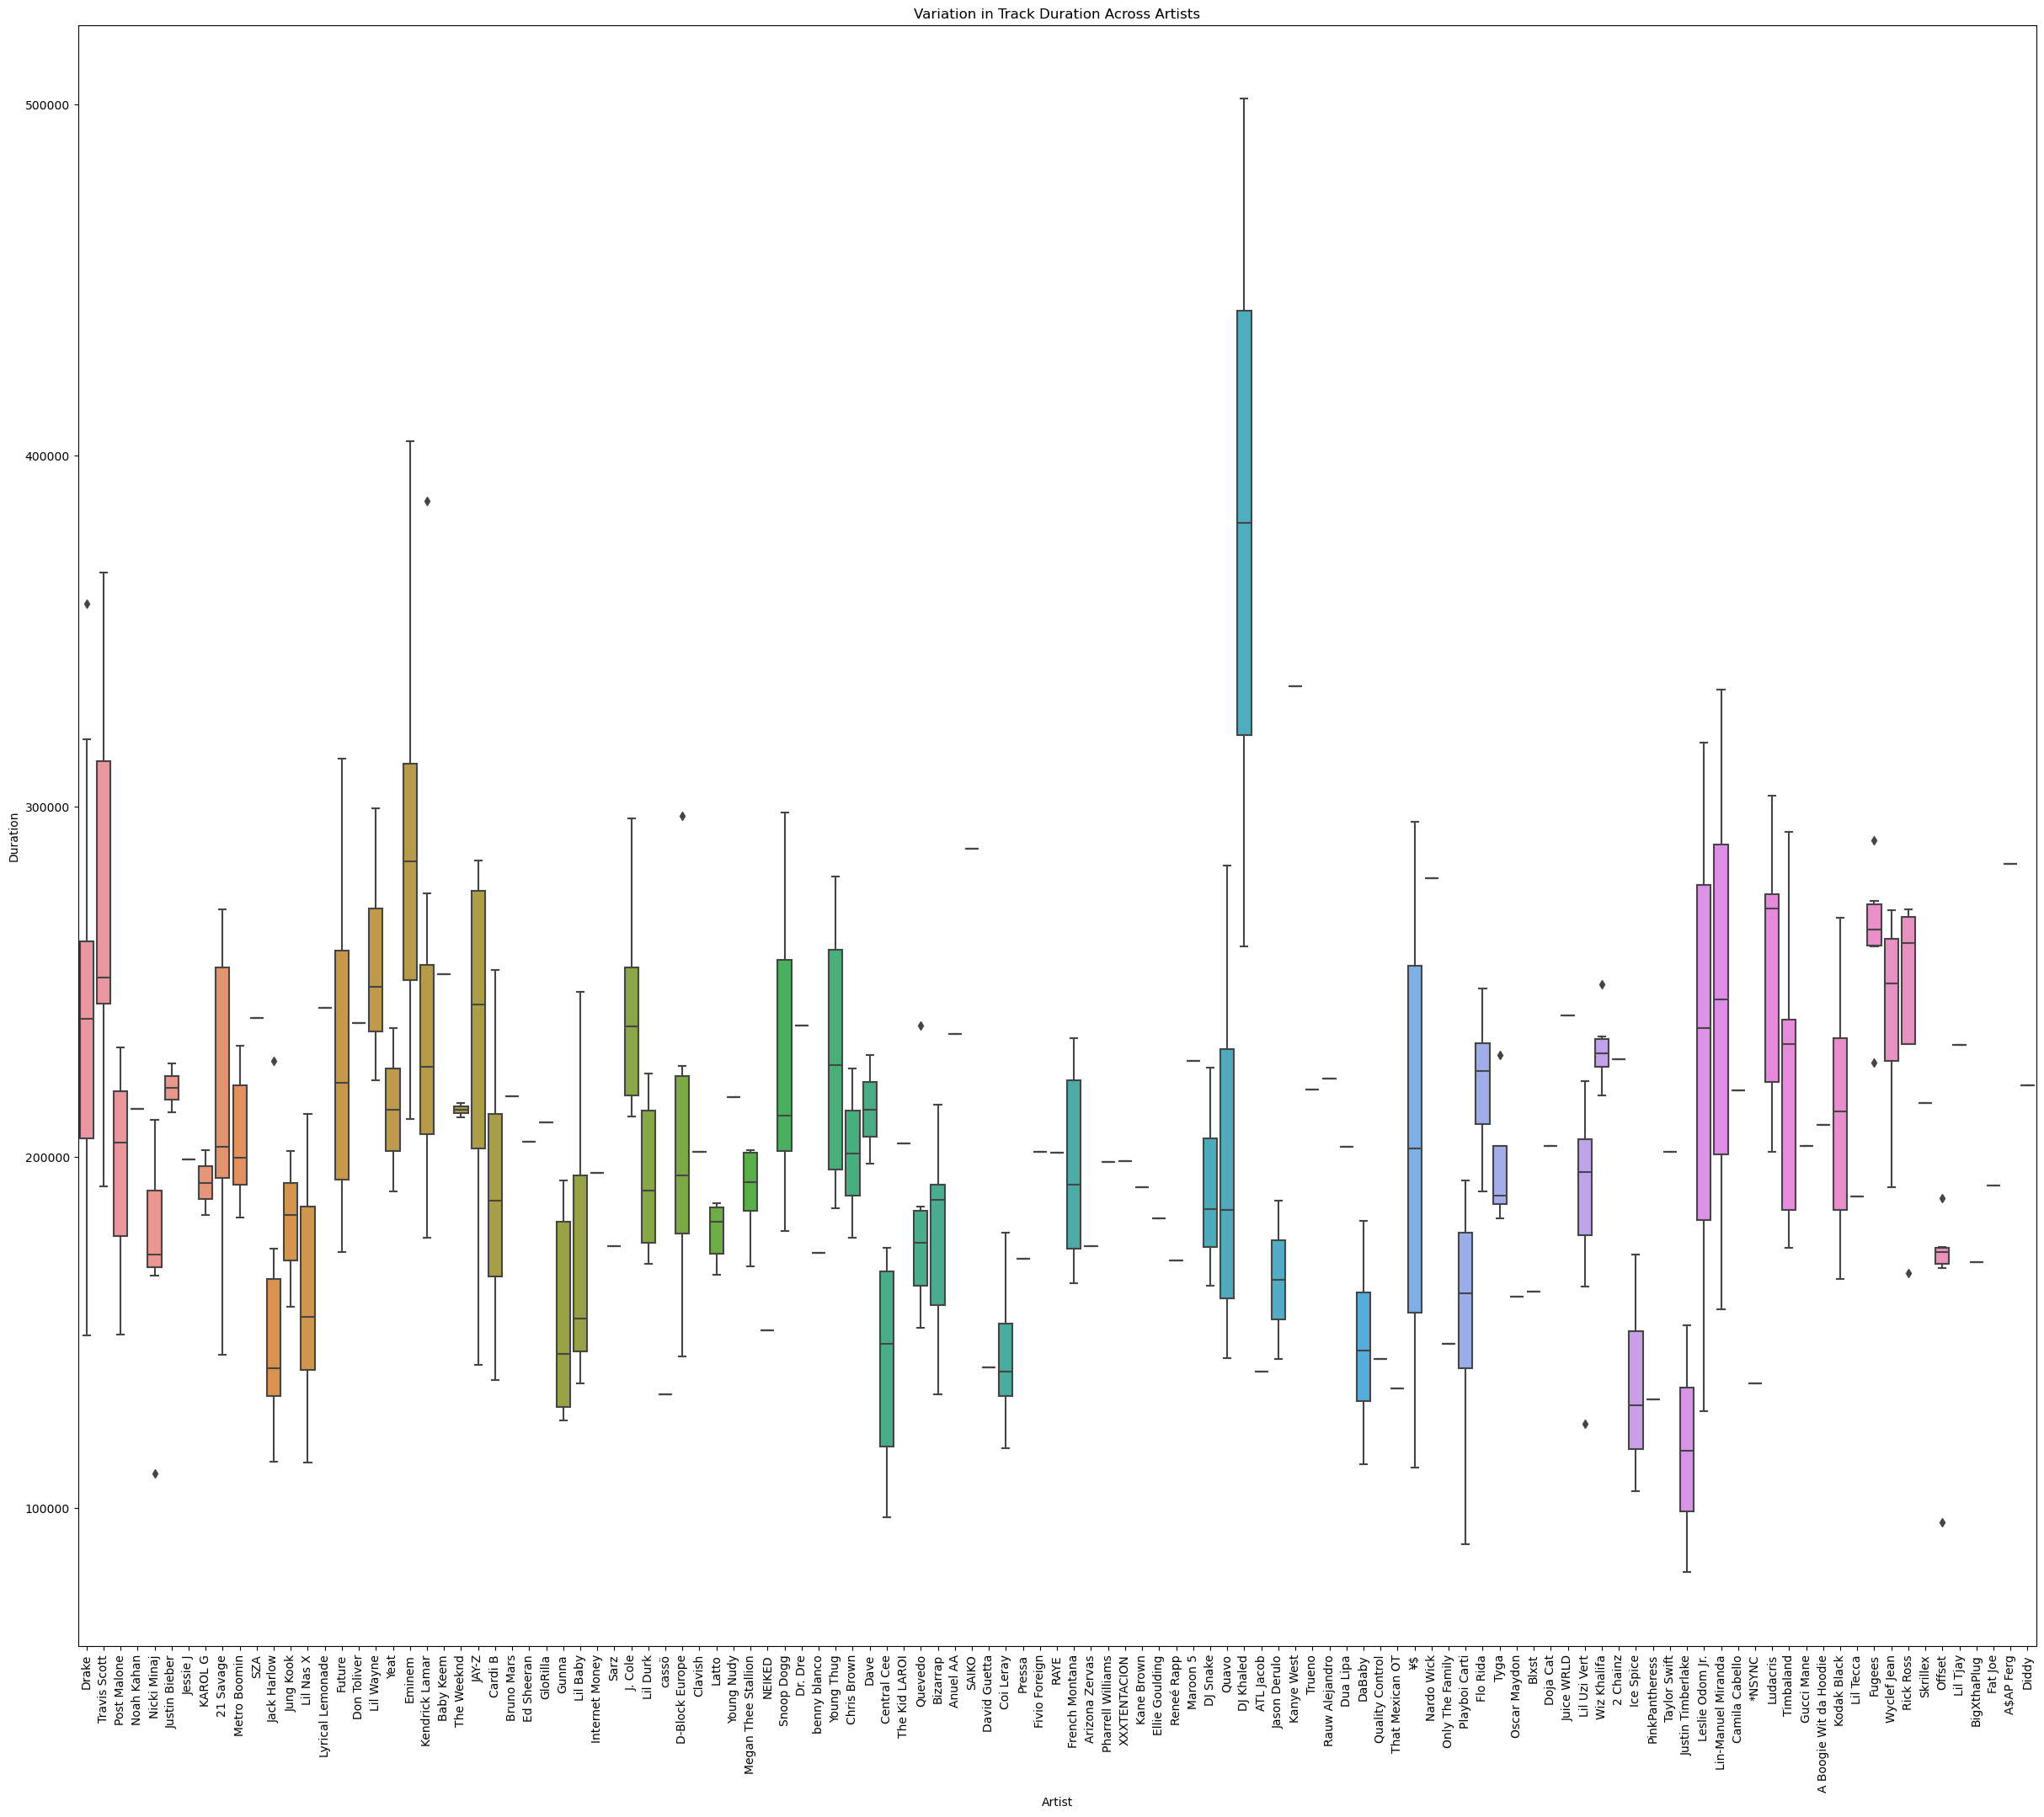

In [60]:
##Q9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
     #violin plot?
plt.figure(figsize=(30,25))
sns.boxplot(x='Artist', y='Duration (ms)', data=df3)
plt.title('Variation in Track Duration Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration')
plt.xticks(rotation=90)
plt.show()


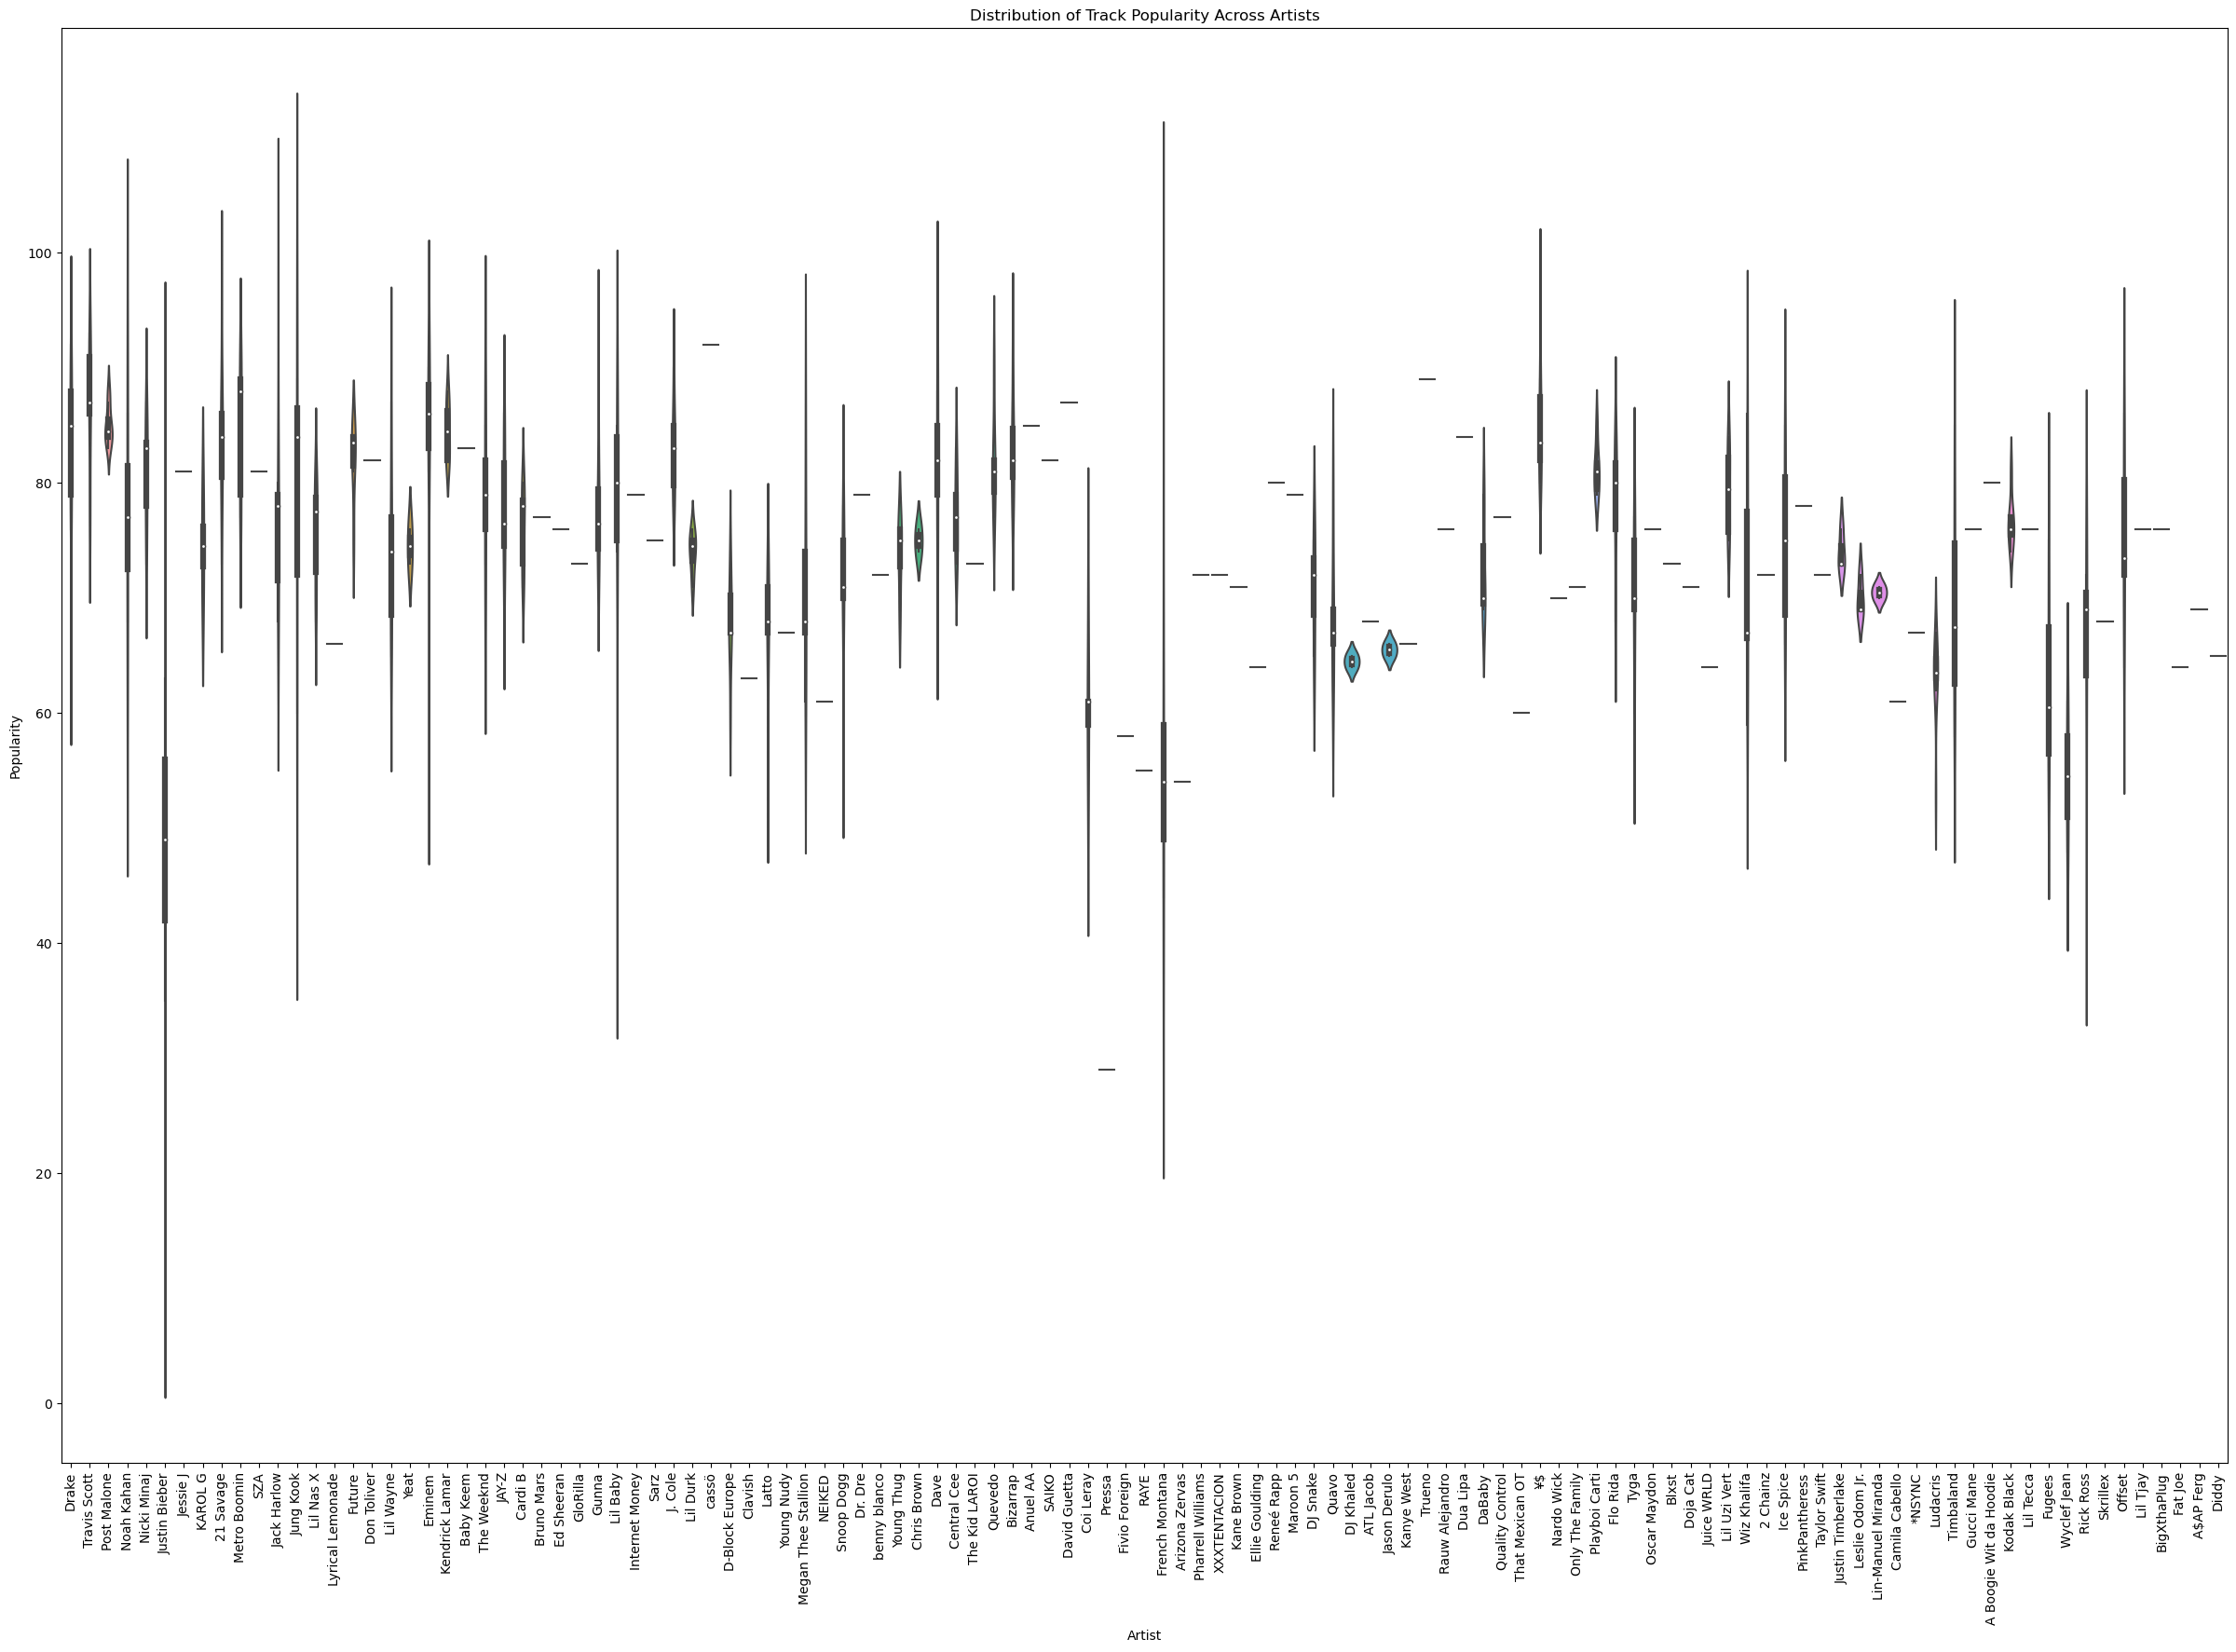

In [69]:
##Q10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
      #violin plot.
plt.figure(figsize=(30, 20))
sns.violinplot(x='Artist', y='Popularity', data=df3)
plt.title('Distribution of Track Popularity Across Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()
